# Contents:

   - [Finding the Equation of a Line](#Finding-the-Equation-of-a-Line)
       - [Simple Plot](#Simple-Plot)
       - [Linear Algebra](#Linear-Algebra)
           - [Problems with this Approach](#Problems-with-this-Approach)
   - [Adding a Third Point](#Adding-a-Third-Point)
   - [Line Fitting with more than 2 points](#Line-Fitting-with-more-than-2-points)
   - [Possible Solution](#Possible-Solution)
     - [Example](#Example)
     - [Solution](#Solution)
   - [Bring the Math](#Bring-the-Math)
       - [Slope $m$](#Slope-$m$)
       - [Intercept $b$](#Intercept-$b$)
   - [Back to Reality](#Back-to-Reality)
       - [Plot for visual confirmation](#Plot-for-visual-confirmation)
   - [Doing it the Smart Way](#Doing-it-the-Smart-Way)
       - [Letting other people do it for you](#Letting-other-people-do-it-for-you)
       - [Numpy Arrays](#Numpy-Arrays)
       - [R Squared Value](#R-Squared-value)
       - [Cough](#Cough)
       - [Visualization Confirmation](#Visualization-Confirmation)
   - [Other Functional Forms](#Other-Functional-Forms)
       - [Curvefit for a Sinusoid](#Curvefit-for-a-Sinusoid)
       - [Make a sine function and a Data set with Noise](#Make-a-sine-function-and-a-Data-set-with-Noise)
       - [Curvefit Usage](#Curvefit-Usage)
       - [Bad Initial Guess](#Bad-Initial-Guess)

## Finding the Equation of a Line

Lets define two points

  $$(2, 3) = (x1,y1)$$
   
   $$(8,23) = (x2,y2)$$

What is the equation of the line that intersects both points?

For 2 points you would typcially find the slope, $m$, using

   $$m = (y2-y1) / (x2-x1)$$

then find the y-intercept, $b$ using

$$\begin{eqnarray}
    y   &=& m * x + b \\
    b   &=& y - m * x \\
    b_1 &=& y_1 - m * x_1 \\
    b_1 &=& y_2 - m * x_2  \\
    b_1 &=& b_2 \\
    \end{eqnarray}
    $$
    
Let's determine the line

In [2]:
# Define our points
(x1,y1) = (2, 3)
(x2,y2) = (8,23)

In [3]:
# Calculate the slope
m = (y2-y1) / (x2-x1)
m

3.3333333333333335

In [4]:
# Calculate the y-intercept (b)
b1 = y1 - m * x1
b2 = y2 - m * x2
b1,b2

(-3.666666666666667, -3.666666666666668)

### Simple Plot
Now let's plot up the line so we now what it looks like. Visualizing things can actaully make a difference and can identify errors

In [5]:
import matplotlib.pyplot as plt

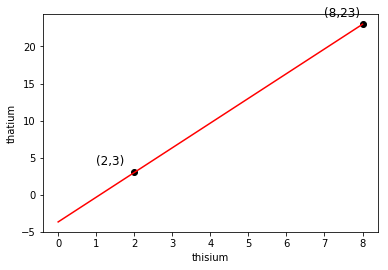

In [6]:
plt.plot([x1,x2],[y1,y2],'ko')
plt.plot([0,x2],[b2,y2],'red')
plt.text(x1-1,y1+1,"({},{})".format(x1,y1),fontsize=12)
plt.text(x2-1,y2+1,"({},{})".format(x2,y2),fontsize=12)
plt.xlabel("thisium")
plt.ylabel("thatium");

### Linear Algebra 
We can do the same thing using Linear Algebra

- [Matrix Multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication)
- [Linear Algebra](https://en.wikipedia.org/wiki/Linear_algebra)
- [Matrix Inverse](https://en.wikipedia.org/wiki/Invertible_matrix)
- [Linear Least Squares](https://en.wikipedia.org/wiki/Linear_least_squares)
- [Numpy Least Squares](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)
- [Numpy dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)
- [Numpy Inverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)
- [Numpy PseudoInverse](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html)

In [23]:
import numpy as np
# y = mx + b 
yt = np.array([y1,y2])
At = np.array([[x1,1],[x2,1]])
print(At)
xt = np.dot(np.linalg.inv(At),yt)
print("Inverse:        ", xt)
xt = np.dot(np.linalg.pinv(At),yt)
print("Pseudo Inverse: ", xt)
xt = np.linalg.lstsq(At,yt, rcond=None)[0]
print("Least Squares:  ", xt)

[[2 1]
 [8 1]]
Inverse:         [ 3.33333333 -3.66666667]
Pseudo Inverse:  [ 3.33333333 -3.66666667]
Least Squares:   [ 3.33333333 -3.66666667]


#### Problems with this Approach
- What happens when you add more points?
- What happens when the function form in higher order than linear?

## Adding a Third Point
What if we add a third point at

   $$(5,12) = (x_3,y_3)$$

In [7]:
(x3,y3) = (5,12)

Text(4,13,'(5,12)')

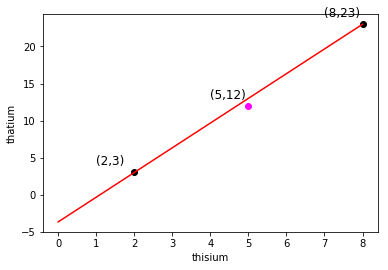

In [8]:
plt.plot([x1,x2],[y1,y2],'ko')
plt.plot([0,x2],[b2,y2],'red')
plt.text(x1-1,y1+1,"({},{})".format(x1,y1),fontsize=12)
plt.text(x2-1,y2+1,"({},{})".format(x2,y2),fontsize=12)
plt.xlabel("thisium")
plt.ylabel("thatium")
plt.plot(x3,y3,'o', color='fuchsia')
plt.text(x3-1,y3+1,"({},{})".format(x3,y3),fontsize=12)


In [9]:
# y = mx + b 
y = np.array([y1,y2,y3]).T
A = np.array([[x1,1],[x2,1],[x3,1]])
np.dot(np.linalg.pinv(A),y)

array([ 3.33333333, -4.        ])

## Line Fitting with more than 2 points
We did not choose wisely there. The point is not on the line.  What do we do? Options:

   - Pick two points, ignoring the third
   - Calculate three different lines, picking the best or averaging
   - Write equations for all three lines and solve for the line

For the first two options, imagine that third point is

   $$(5,30) = (x_3,y_3)$$


Text(4,31,'(5,30)')

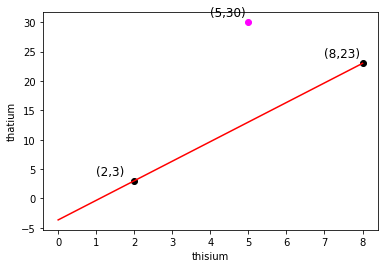

In [10]:
(x3,y3) = (5,30)
plt.plot([x1,x2],[y1,y2],'ko')
plt.plot([0,x2],[b2,y2],'red')
plt.text(x1-1,y1+1,"({},{})".format(x1,y1),fontsize=12)
plt.text(x2-1,y2+1,"({},{})".format(x2,y2),fontsize=12)
plt.xlabel("thisium")
plt.ylabel("thatium")
plt.plot(x3,y3,'o', color='fuchsia')
plt.text(x3-1,y3+1,"({},{})".format(x3,y3),fontsize=12)

## Possible Solution

Lets choose the last option of writing out all the equations
$$\begin{eqnarray}
    y_1 &=& m x_1 + b\\
    y_2 &=& m x_2 + b\\
    y_3 &=& m x_3 + b
    \end{eqnarray}
  $$  
That wasn't so hard, but repeatative if you ask me.

How do we solve this? Well, we are back in the same situation we were in before, and we know a line does not exactly go through all three points.  Here we want to find the best fitting values for the values

   - $m$ 
   - $b$
   
### Example
You have seen these types of problems before, e.g.  find the $x$ value where $f(x) = (x-3)^2 + 10$ reaches its mimimum
   
### Solution
   1. Take the derivative of $f(x)$ with respect to $x$, i.e. $df/dx$
   2. Set $df/dx$ equal to 0, i.e. $df/dx = 0$
   3. Solve to $df/dx = 0$ for $x$    

$$
\begin{eqnarray}
f(x) &=& (x-3)^2 + 10 \\
\dfrac{d}{dx}f(x) &=& 2 (x-3) \\
 &=& 2 (x-3)= 0\\
 && x = 3 
\end{eqnarray}
$$

We can do the same for the set of equations above

   1. Set up a function we would like to find the minumum of
   2. Take the derivatives (partial in this case) of the function
   3. Solve for equation for the best fitting line

Lets do it

## Bring the Math
First define the **misfit function**: $\chi$
$$\begin{eqnarray}
\chi(m,b) =& (y_1 - m x_1 - b)^2 + \\
&(y_2 - m x_2 - b)^2 + \\
&(y_3 - m x_3 - b)^2 
\end{eqnarray}$$

Now take the partial derivatives with respect to $m$ and set equal to $0$
$$\begin{eqnarray}
\dfrac{\partial\chi(m,b)}{\partial m} &=& 2(y_1 - m x_1 - b)(-x_1) + \\
&&2(y_2 - m x_2 - b)(-x_2) + \\
&&2(y_3 - m x_3 - b)(-x_3) 
\\
0&=&-x_1y_1 + m x_1^2 + bx_1 + \\
&&-x_2y_2 + m x_2^2 + bx_2 + \\
&&-x_3y_3 + m x_3^2 + bx_3 
\\
0&=& -(x_1y_1 + x_2y_2 + x_3y_3) + \\
&& m(x_1^2 + x_2^2 + x_3^2) + \\
&& b(x_1+x_2+x_3) 
\\
0 &=& -\sum_{i=1}^{3} x_iy_i + m \sum_{i=1}^{3} x_i^2 + b \sum_{i=1}^3 x_i
\end{eqnarray}$$

and with repsect to $b$ and set equal to $0$
$$\begin{eqnarray}
\dfrac{\partial\chi(m,b)}{\partial b} &=& -2(y_1 - m x_1 - b) + \\
&&-2(y_2 - m x_2 - b) + \\
&&-2(y_3 - m x_3 - b) 
\\
0&=& -(y_1 + y_2 + y_3) + \\
&& m(x_1 + x_2 + x_3) + \\
&& 3b
\\
0 &=& -\sum_{i=1}^{3} y_i + m \sum_{i=1}^{3} x_i + 3 b
\end{eqnarray}$$

Now we have two equations and two unknowns which we can solve:
$$
\begin{eqnarray}
\sum x_i y_i &=& \sum x_i^2 m + \sum x_i b \\
\sum y_i &=& \sum x_i m + 3 b
\end{eqnarray}
$$

$$
\begin{eqnarray}
s_{xy} &=& s_{xx} m + s_{x} b \\
s_{y} &=& s_{x} m + n b
\end{eqnarray}
$$

Isolate the parameter $b$:

$$
\begin{eqnarray}
\dfrac{s_{xy}}{s_{x}} &=& \dfrac{s_{xx}}{s_{x}} m + b \\
\dfrac{s_{y}}{n} &=& \dfrac{s_{x}}{n}m +  b
\end{eqnarray}
$$
Set those equations equal to each other
$$
\begin{eqnarray}
\dfrac{s_{xy}}{s_{x}} - \dfrac{s_{xx}}{s_{x}} m &=&\dfrac{s_{y}}{n} - \dfrac{s_{x}}{n}m \\
\end{eqnarray}
$$
Solve for $m$
$$
\begin{eqnarray}
\dfrac{s_{xy}}{s_{x}} -\dfrac{s_{y}}{n} &=& \dfrac{s_{xx}}{s_{x}} m -\dfrac{s_{x}}{n}m   \\
\dfrac{s_{xy}n - s_y s_{x}}{s_x n} &=& m \dfrac{s_{xx}n -s_x s_x }{n s_x} \\
s_{xy}n - s_y s_{x} &=& m \left(s_{xx}n - s_x s_x \right) \\
\end{eqnarray}
$$
### Slope $m$
$$
\begin{eqnarray}
m &=& \dfrac{s_{xy}n - s_y s_{x} }{ s_{xx}n - s_x s_x }
\end{eqnarray}
$$

Now we solve for $b$ by inserting the solution for $m$ into one of the equations above:
$$
\begin{eqnarray}
\dfrac{-s_{y}}{n} &=& \dfrac{s_{x}}{n}m +  b\\
\dfrac{-s_y}{n} &=& \dfrac{s_x}{n} \left(\dfrac{s_{xy}n - s_y s_{x} }{ s_{xx}n  -s_x s_x }\right) + b \\
\end{eqnarray}
$$

Isolate b and simplify
$$
\begin{eqnarray}
b &=& \dfrac{s_y}{n} - \dfrac{s_x}{n} \left(\dfrac{s_{xy}n - s_y s_{x} }{ s_{xx}n -s_x s_x }\right)\\
\end{eqnarray}
$$

Get a common demoninator
$$
\begin{eqnarray}
b &=& \dfrac{s_y (s_{xx}n -s_x s_x)}{n(s_{xx}n-s_x s_x)} - \dfrac{s_x (s_{xy}n - s_y s_{x} )}{ n(s_{xx}n -s_x s_x )} \\
b &=& \dfrac{s_y (s_{xx}n -s_x s_x)  - s_x (s_{xy}n - s_y s_{x} )}{ n(s_{xx}n -s_x s_x )} \\
\end{eqnarray}
$$

Expand the terms and collect / remove common terms and factors
$$
\begin{eqnarray}
b &=& \dfrac{s_y s_{xx}n - s_y s_x s_x  - s_x s_{xy}n + s_x s_y s_{x}}{ n(s_{xx}n -s_x s_x )} \\
b &=& \dfrac{s_y s_{xx}n  - s_x s_{xy}n }{ n(s_{xx}n -s_x s_x )} \\
\end{eqnarray}
$$
### Intercept $b$
$$
\begin{eqnarray}
b &=& \dfrac{s_y s_{xx}  - s_x s_{xy} }{ s_{xx}n -s_x s_x } \\
\end{eqnarray}
$$

## Back to Reality

In [11]:
n = 3
sx  = sum([x1,x2,x3])
sy  = sum([y1,y2,y3])
sxx = sum([x1*x1,x2*x2,x3*x3])
sxy = sum([x1*y1,x2*y2,x3*y3])
d = sxx * n - sx * sx
b = (sy * sxx - sx * sxy)/d
m = (sxy * n - sy * sx) / d
m,b

(3.3333333333333335, 2.0)

### Plot for visual confirmation

Text(4,31,'(5,30)')

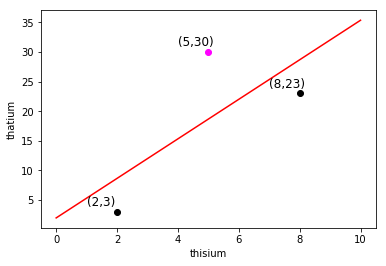

In [12]:
plt.plot([x1,x2],[y1,y2],'ko')
plt.plot([0,10],[m*0 + b, m*10+b],'red')
plt.text(x1-1,y1+1,"({},{})".format(x1,y1),fontsize=12)
plt.text(x2-1,y2+1,"({},{})".format(x2,y2),fontsize=12)
plt.xlabel("thisium")
plt.ylabel("thatium")
plt.plot(x3,y3,'o', color='fuchsia')
plt.text(x3-1,y3+1,"({},{})".format(x3,y3),fontsize=12)

Wow, that was too much math, do we have to do that every time? Well no. Recognize the equations

$$
\begin{eqnarray}
\sum x_i y_i &=& \sum x_i^2 m + \sum x_i b \\
\sum y_i &=& \sum x_i m + n b
\end{eqnarray}
$$

are not dependent on the number of data points except for that n, which is the number of data points.   

## Doing it the Smart Way
#### Letting other people do it for you
Smart people have already done this for you so you do not have to do it again. Introducing
[NumPy Polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

In [13]:
import numpy as np
x = np.array([x1,x2,x3])
y = np.array([y1,y2,y3])
np.polyfit(x,y, 1)

array([3.33333333, 2.        ])

Wow, those values look familiar, and it was way easier.  We can now compute the residual of the fit using our **misfit** function

$$
\chi(m,b) = \sum (y_i - m x_i - b)^2
$$

but that means we need the solution at every data point; Introducting [Numpy Polyval](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyval.html)

#### Numpy Arrays
Since we have [numpy](http://www.numpy.org/) loaded now, we can make arrays, simplifying the expressions

In [14]:
xi = np.array([x1,x2,x3]) # Make an array
yi = np.array([y1,y2,y3]) # ... and another one

# Calculate the slope and intercept (like before)
p3 = np.polyfit(xi, yi, 1)
print(p3)

# Compute predicted values
yp = np.polyval(p3,xi)

# Compute the error
chi = sum((yi - yp)**2)
chi

[3.33333333 2.        ]


192.66666666666669

That misfit value is not, uhh, useful; it is just some large number.  It is only useful in reference to other values. Let's try normalizing it with respect to something.

### R-Squared value
Typically, people like to use something called "R-squared" otherwise known as the [Coefficient of Determinatio](https://en.wikipedia.org/wiki/Coefficient_of_determination)

$$ R^2 = 1 - \dfrac{\sum (y_i - m x_i - b)^2}{\sum (y_i - \bar{y})^2}$$

The demoninator, $\sum (y_i - \bar{y})^2$, is the [total sum of squares](https://en.wikipedia.org/wiki/Total_sum_of_squares), and looks a lot like the variance, but without a normalization factor of $n$

The numerator is out **misfit** function, $\chi(m,b)$

In [15]:
ym = np.mean(yi)
TSS = sum( (yi - ym)**2 )
R2 = 1.0 - chi / TSS
R2

0.5093378607809846

#### Cough
Wow, that is a bad fit.

Lets try our original point, before I changed it.

$$(5,12) = (x3,y3)$$

In [16]:
(x4,y4) = (5,12)

In [25]:
xi = np.array([x1,x2,x4])
yi = np.array([y1,y2,y4])

# Calculate the slope and intercept (like before)
p4 = np.polyfit(xi, yi, 1)
print(p4)
# Compute predicted values
yp = np.polyval(p4,xi)

# Compute the error
chi = sum((yi - yp)**2)
print("misfit:", chi)

# Mean of the data
ym = np.mean(yi)

# Total Sum of Squares
TSS = sum( (yi - ym)**2 )

# R-Squared
R2 = 1.0 - chi / TSS
R2

[ 3.33333333 -4.        ]
misfit: 0.6666666666666655


0.9966777408637874

Ahh, that feels like a better fit, and it is.
### Visualization Confirmation

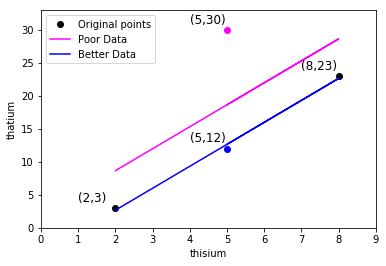

In [26]:
plt.plot([x1,x2],[y1,y2],'ko',label="Original points")

plt.text(x1-1,y1+1,"({},{})".format(x1,y1),fontsize=12)
plt.text(x2-1,y2+1,"({},{})".format(x2,y2),fontsize=12)

# Data fits
plt.plot(xi,np.polyval(p3,xi),'fuchsia',label="Poor Data")
plt.plot(xi,np.polyval(p4,xi),'blue', label="Better Data")

# Poor data and text label
plt.plot(x3,y3,'o', color='fuchsia')
plt.text(x3-1,y3+1,"({},{})".format(x3,y3),fontsize=12)

# Better data and text label
plt.plot(x4,y4,'o', color='blue')
plt.text(x4-1,y4+1,"({},{})".format(x4,y4),fontsize=12)

# Extra Goodies
plt.xlim(0,9)
plt.ylim(0,33)
plt.xlabel("thisium")
plt.ylabel("thatium")
plt.legend();

# Other Functional Forms

Polynominals of any order, e.g. $f(x) = a x^4 + b x^3 + c x^2 + d x + e$ are easily handled using **numpy.polyval** by changing the degree value.

Other functional forms can be fit by either starting with the orignal equations and following the same method **provided the equations are linear with respect to the parameters**; No power terms, no sin, cos or tan functions, no expoentials.

For more complex, non-linear functions we can use [scipy.optimize.curvefit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).  


The use of [scipy.optimize.curvefit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) can be initially confusing, but easier to understand with an example.

## Curvefit for a Sinusoid

In [19]:
T = 27.456
A = 0.81   
phi = 1.27
x = np.arange(0,100) # Make an array from 0 to 99

#### Make a sine function and a Data set with Noise

In [20]:
def sine_func(x, A, T, phi):
    y = A * np.sin( 2 * np.pi * x / T + phi )
    return y

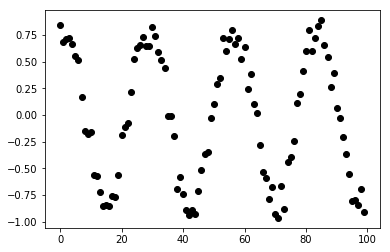

In [21]:
y = sine_func(x, A,T,phi) + np.random.normal(0.0, 0.10, size=x.shape)
plt.plot(x,y,'ko')

### Curvefit Usage

In [22]:
import scipy
from scipy.optimize import curve_fit

[ 0.82483233 27.53188193  1.29157441]
[ 0.81  27.456  1.27 ]


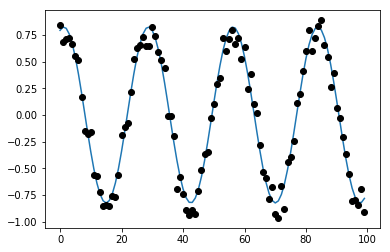

In [23]:
# Initial Guess
guess = [1.0, 22.0, 0.0]
# Run the Curvefit
popt, pcov = curve_fit(sine_func, x, y, p0 = guess)

# Solution
print(popt)
print(np.array([A,T,phi]))

# Visualization
yp = sine_func(x, popt[0],popt[1],popt[2])
plt.plot(x,yp)
plt.plot(x,y,'ko')

### Bad Initial Guess

Sometimes a bad initial guess can result in a poor final fit

[ 0.21754699 19.77443663 -0.03278013]
[ 0.81  27.456  1.27 ]


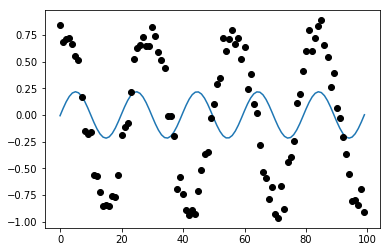

In [24]:
# Poor Initial Guess
guess = [1.0, 21.0, 0.0]
popt, pcov = curve_fit(sine_func, x, y, p0 = guess)

# Solution
print(popt)
print(np.array([A,T,phi]))

# Visualization
yp = sine_func(x, popt[0],popt[1],popt[2])
plt.plot(x,yp)
plt.plot(x,y,'ko')

# Data Sets

  - DJIA - DJIA.csv
      - Find Financial Crises or Steep Market Drops
  - Planetary Orbits - orbits.txt
      - Find the planets and which ones are going backwards
  - GPS - gps_albh.txt
      - Find the plate velocity
      - What is remaining when the plate motion is removed
  - Long Term Newport Tide Gauge - tide_gauge_long.txt
      - What is the rate of Sea Level Rise
  - Short Term Newport Tide Gauge - tide_gauge_short.txt
      - What is the periodicity of the tide and their amplitude